# Implement Multi-Armed Bandit Problem from Scratch in Python




#### **Importing Necessary Libraries**

In [21]:
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

- `numpy` is used to create arrays to store counts and estimated values of each arm (ad slot).
- `random` helps with selecting arms randomly during exploration phases.

#### **Class Definition for MultiArmedBandit**

This class implements the Epsilon-Greedy strategy for selecting ad slots (arms) based on their performance.

---

#### **Select an Arm Using Epsilon-Greedy**

The `select_arm` method is responsible for choosing which ad slot to display. It follows the Epsilon-Greedy algorithm, which explores with a small probability (`epsilon`) and exploits the current best-performing slot the rest of the time.

---

#### **Updating Estimated CTR After Each Ad Display**

The `update` method is used to update the estimated CTR of the chosen ad slot based on whether a user clicked on the ad or not.

In [16]:
class MultiArmedBandit:
    def __init__(self, n_arms, epsilon):
        self.n_arms = n_arms
        self.epsilon = epsilon
        self.counts = np.zeros(n_arms)
        self.values = np.zeros(n_arms)
    def select_arm(self):
        if random.random() > self.epsilon:
            return np.argmax(self.values)
        else:
            return random.randint(0, self.n_arms - 1)
    def update(self, chosen_arm, reward):
        self.counts[chosen_arm] += 1
        n = self.counts[chosen_arm]
        value = self.values[chosen_arm]
        new_value = value + (1 / n) * (reward - value)
        self.values[chosen_arm] = new_value

### `MultiArmedBandit` Class

- `n_arms`: Number of ad slots (4 in this case).
- `epsilon`: Controls the balance between exploration and exploitation.
- `counts`: Tracks how many times each ad slot was selected.
- `values`: Stores the estimated CTR for each ad slot based on collected feedback.

---
### `select_arm` function

- **Exploit**: If a random number is greater than `epsilon`, the ad slot with the highest estimated CTR is selected (greedy choice).
- **Explore**: Otherwise, a random ad slot is selected, ensuring the algorithm continues to explore all slots.


----

### `update` function

- **reward**: 1 if the user clicked the ad, 0 otherwise.
- **Update Formula**: The incremental update formula adjusts the estimated CTR by accounting for new feedback. This avoids recalculating everything from scratch.


#### **Simulating the Ad Environment**

The `AdEnvironment` class represents the real-world environment where each ad slot has a fixed (but hidden) true CTR. This is used to generate feedback (click or no click) for each ad impression.





In [27]:
class AdEnvironment:
    def __init__(self, true_ctr):
        self.true_ctr = true_ctr
    def get_reward(self, arm):
        return 1 if random.random() < self.true_ctr[arm] else 0

### `AdEnvironment` Class
- **true_ctr**: Represents the real CTR for each ad slot (these values are hidden from the bandit).
- **get_reward**: Simulates a user's interaction by returning a click (reward = 1) or no click (reward = 0) based on the true CTR of the selected slot.



#### **Running the Simulation**

This function runs the multi-armed bandit simulation for a given number of impressions and tracks the rewards (clicks) received over time.

In [30]:
 def run_simulation_with_tracking(n_impressions, epsilon, true_ctr):
      n_arms = len(true_ctr)
      bandit = MultiArmedBandit(n_arms, epsilon)
      env = AdEnvironment(true_ctr)

      rewards = np.zeros(n_impressions)
      estimates_history = np.zeros((n_impressions, n_arms))  # To track estimated CTRs

      for i in range(n_impressions):
        chosen_arm = bandit.select_arm()
        reward = env.get_reward(chosen_arm)
        bandit.update(chosen_arm, reward)
        rewards[i] = reward
        estimates_history[i] = bandit.values  # Track current estimates

      return rewards, bandit, estimates_history

- **n_impressions**: Number of times an ad will be shown.
- **epsilon**: Exploration-exploitation trade-off value.
- **true_ctr**: The true click-through rates of the ad slots, known only to the environment.

#### **Parameters and Running the Model**

Here we define the true click-through rates for the ad slots and set up the simulation.


In [32]:
true_ctr = [0.04, 0.06, 0.02, 0.01]
n_impressions = 1000
epsilon = 0.1
rewards, bandit, estimates_history = run_simulation_with_tracking(n_impressions, epsilon, true_ctr)

- **true_ctr**: Represents the real CTRs for each ad slot, with `Sidebar` having the highest CTR (0.06) and `Pop-up` the lowest (0.01).
- **n_impressions**: We simulate 1000 ad displays.
- **epsilon**: We set `epsilon = 0.1` for 10% exploration.

#### **Displaying Results**

After running the simulation, we display the total clicks and the estimated CTRs for each ad slot.

In [20]:
total_rewards = np.sum(rewards)
optimal_arm = np.argmax(true_ctr)

print(f"Total Clicks (Rewards): {total_rewards}")
print(f"Estimated CTRs for each slot: {bandit.values}")
print(f"Optimal arm (slot with highest true CTR): Slot {optimal_arm + 1}")

Total Clicks (Rewards): 52.0
Estimated CTRs for each slot: [0.05       0.05793991 0.03448276 0.        ]
Optimal arm (slot with highest true CTR): Slot 2


- **total_rewards**: The sum of all the clicks received during the simulation.
- **bandit.values**: The estimated CTRs for each slot based on user feedback.
- **optimal_arm**: The ad slot with the highest true CTR (in this case, it should be `Sidebar`).


### **Visualizations**

### Plotting Cumulative Rewards Over Time

This plot helps us track how many clicks the bandit has accumulated over time.

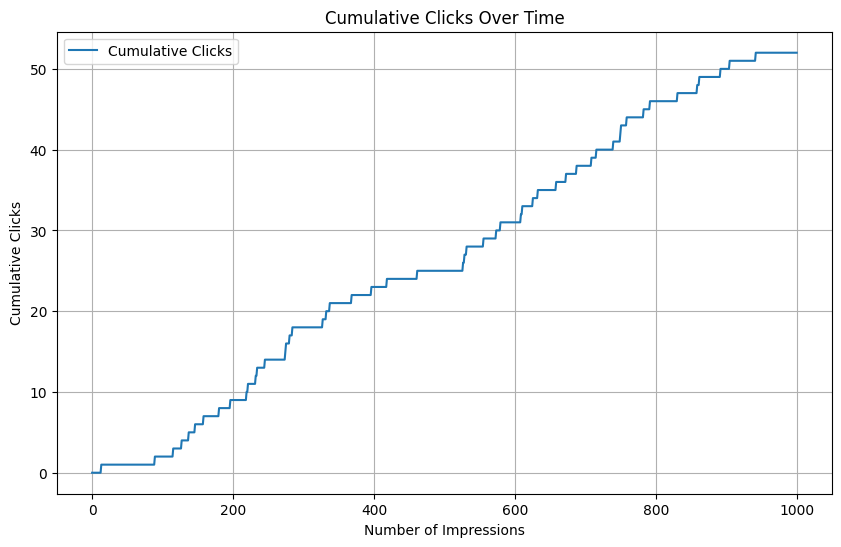

In [22]:
def plot_cumulative_rewards(rewards):
    cumulative_rewards = np.cumsum(rewards)  # Cumulative sum of rewards (clicks)

    plt.figure(figsize=(10, 6))
    plt.plot(cumulative_rewards, label='Cumulative Clicks')
    plt.title('Cumulative Clicks Over Time')
    plt.xlabel('Number of Impressions')
    plt.ylabel('Cumulative Clicks')
    plt.grid(True)
    plt.legend()
    plt.show()

# Plot cumulative rewards
plot_cumulative_rewards(rewards)

### Plotting Estimated CTR vs True CTR
We can compare the estimated CTR for each ad slot with the true CTR at the end of the simulation.

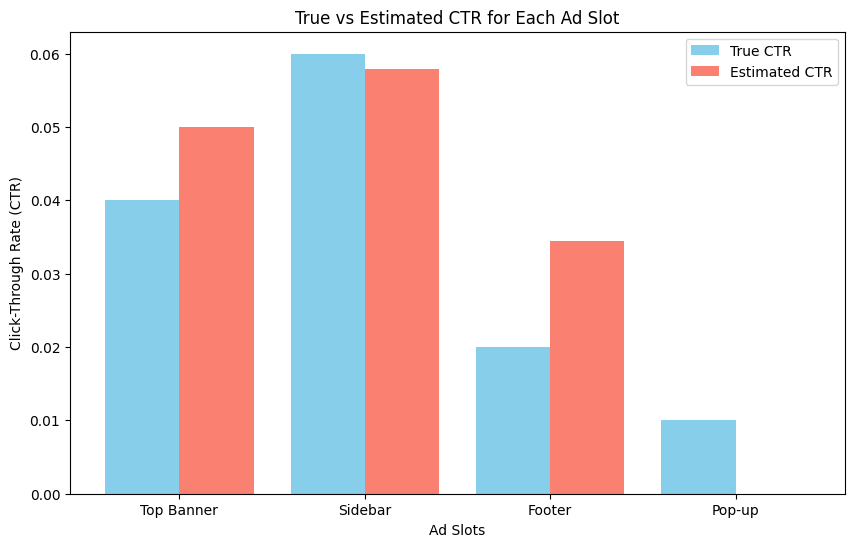

In [23]:
def plot_ctr_estimates(true_ctr, estimated_ctr):
    labels = ['Top Banner', 'Sidebar', 'Footer', 'Pop-up']

    plt.figure(figsize=(10, 6))
    x = np.arange(len(labels))  # Position of the bars

    plt.bar(x - 0.2, true_ctr, 0.4, label='True CTR', color='skyblue')
    plt.bar(x + 0.2, estimated_ctr, 0.4, label='Estimated CTR', color='salmon')

    plt.xticks(x, labels)
    plt.xlabel('Ad Slots')
    plt.ylabel('Click-Through Rate (CTR)')
    plt.title('True vs Estimated CTR for Each Ad Slot')
    plt.legend()
    plt.show()

# Plot true vs estimated CTR
plot_ctr_estimates(true_ctr, bandit.values)


### Plotting Number of Times Each Slot Was Selected
This plot visualizes how frequently the Epsilon-Greedy algorithm selected each ad slot during the simulation.

<ipython-input-24-52c2302f12e8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=counts, palette='coolwarm')


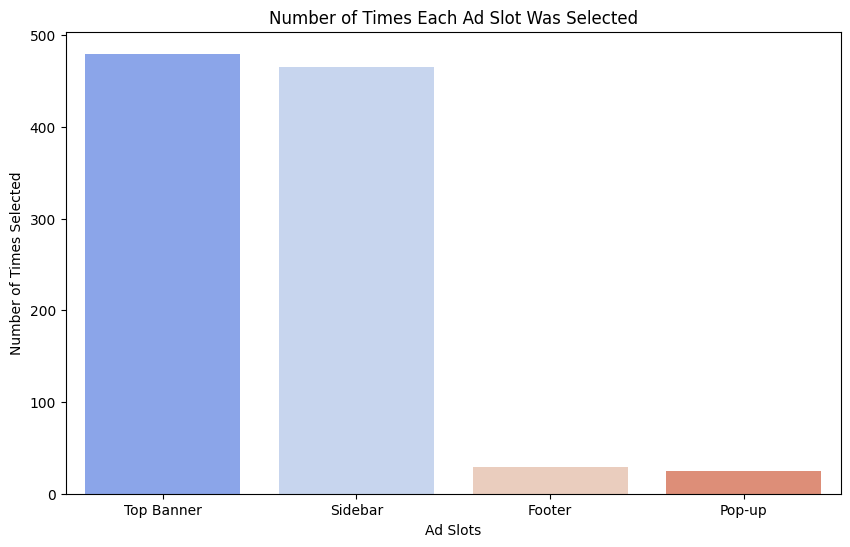

In [24]:
def plot_selection_counts(counts):
    labels = ['Top Banner', 'Sidebar', 'Footer', 'Pop-up']

    plt.figure(figsize=(10, 6))
    sns.barplot(x=labels, y=counts, palette='coolwarm')

    plt.xlabel('Ad Slots')
    plt.ylabel('Number of Times Selected')
    plt.title('Number of Times Each Ad Slot Was Selected')
    plt.show()

# Plot selection counts
plot_selection_counts(bandit.counts)


### Plotting the Evolution of CTR Estimates
This plot shows the probability distribution for each ad slot over the 1000 iterations.

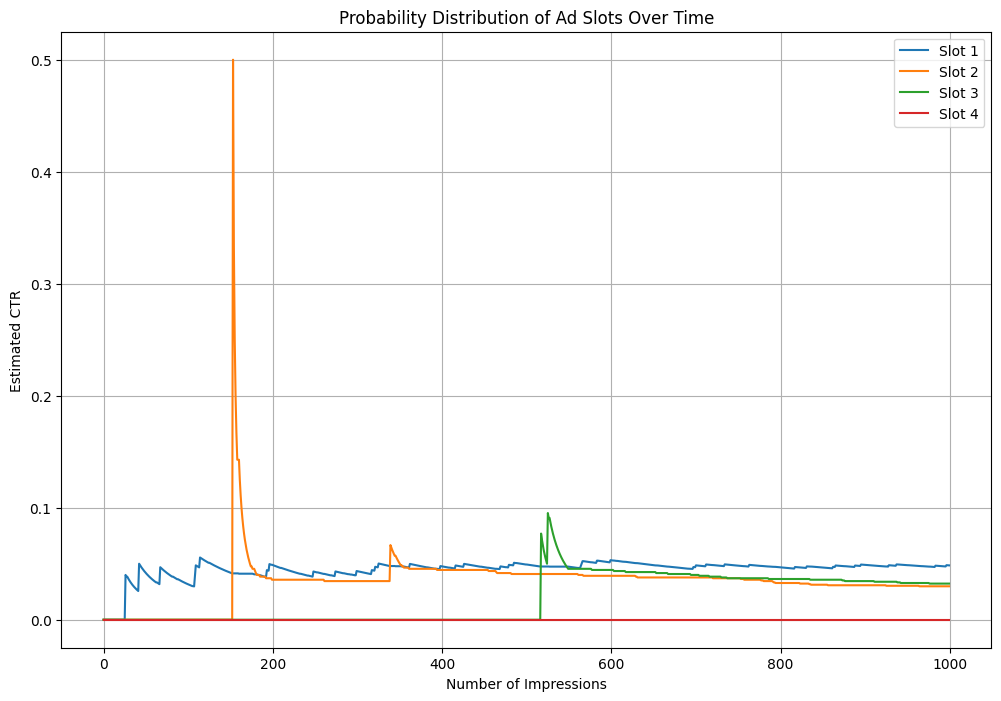

In [33]:
def plot_probability_distribution(estimates_history, n_impressions):
    plt.figure(figsize=(12, 8))

    # Plotting the evolution of estimated CTRs for each ad slot
    for arm in range(estimates_history.shape[1]):
        plt.plot(range(n_impressions), estimates_history[:, arm], label=f'Slot {arm + 1}')

    plt.xlabel('Number of Impressions')
    plt.ylabel('Estimated CTR')
    plt.title('Probability Distribution of Ad Slots Over Time')
    plt.legend()
    plt.grid(True)
    plt.show()

# Parameters: number of impressions and epsilon value
n_impressions = 1000
epsilon = 0.1

plot_probability_distribution(estimates_history, n_impressions)


### Inferences:

#### 1. **Total Clicks (Rewards)**
   - **Result:** 52 total clicks (or rewards) were collected over 1000 impressions.
   - **Inference:** This result indicates that out of 1000 times ads were displayed in different slots, users clicked on the ads 52 times. This gives us an overall conversion rate of about 5.2%. The performance of different ad slots is based on a balance between exploration and exploitation (using the epsilon-greedy strategy) to maximize the number of clicks.

#### 2. **Estimated CTRs for Each Slot**
   - **Result:** The estimated click-through rates (CTRs) for the four ad slots are:
     - Top Banner: 0.05
     - Sidebar: 0.058
     - Footer: 0.034
     - Pop-up: 0.0
   - **Inference:** The estimated CTRs reflect the performance of each slot based on user interactions. The sidebar has the highest estimated CTR (0.0579), which is close to its true CTR (0.06). The pop-up slot has an estimated CTR of 0.0, indicating poor performance (no clicks). These estimates are based on the feedback collected over time from the impressions shown in each slot.

#### 3. **Optimal Arm (Slot with Highest True CTR)**
   - **Result:** Slot 2 (Sidebar) has the highest true CTR.
   - **Inference:** The true CTR is a predetermined value that simulates the actual click-through rate of each slot in the environment. Slot 2 (Sidebar) has a true CTR of 0.06, which makes it the best-performing slot in the environment. The epsilon-greedy algorithm successfully identified this slot as the best one to exploit more often, though it occasionally explored other slots.

#### 4. **Plotting Cumulative Rewards Over Time**
   - **Description:** This plot shows the total number of clicks (rewards) accumulated over 1000 impressions.
   - **Inference:**
     - The cumulative rewards curve steadily increases over time, showing how the algorithm collects clicks from different slots as it explores and exploits. At the 1000th impression, the total number of clicks reached 52. This indicates that the algorithm balanced between exploration and exploitation to identify the best-performing slots without prematurely focusing on just one.

#### 5. **Plotting Estimated CTR vs True CTR**
   - **Description:** This plot compares the estimated click-through rates (CTRs) for each slot with their true CTR values.
   - **Inference:**
     - CTR represents the click-through rate, which is the ratio of clicks to the number of impressions. The closer the estimated CTR is to the true CTR, the better the algorithm's estimation of the slot’s performance.
     - Slot 2 (Sidebar) has the highest alignment between its estimated CTR (0.0579) and true CTR (0.06), meaning the algorithm has learned this slot’s performance well. Slot 1 (Top Banner) has an estimated CTR close to the true value, but Slot 3 (Footer) and Slot 4 (Pop-up) have significant deviations from their true values.

#### 6. **Plotting Number of Times Each Slot Was Selected**
   - **Description:** This plot shows the number of times each slot was chosen for displaying ads during the 1000 impressions.
   - **Inference:**
     - The Top Banner was selected the highest number of times. This could be because, even though it doesn't have the highest true CTR, its estimated CTR was close to the actual value, and due to random exploration, it was selected more often.
     - The Sidebar was selected the second-highest number of times because it has the highest true CTR, and the algorithm learned this over time, exploiting it more frequently.
     - The Footer and Pop-up were selected less often, with the Pop-up slot rarely being chosen due to its poor performance and low estimated CTR.

#### 7. **Step 2: Plotting the Evolution of CTR Estimates**
   - **Description:** This plot shows how the estimated CTRs for each slot evolved over time.
   - **Inference:**
     - Over time, the algorithm refined its understanding of each slot’s performance. Slot 2 (Sidebar) consistently showed a higher probability of yielding clicks, and its estimated CTR remained the highest.
     - The estimated CTR for Slot 1 (Top Banner) started strong but plateaued as the algorithm discovered it wasn’t as effective as Slot 2.
     - Slots 3 (Footer) and 4 (Pop-up) showed lower estimates throughout, with Slot 4’s performance dropping to near zero. This demonstrates how the epsilon-greedy strategy adapts to changes in slot performance over time.